In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [131]:
lloyds = pd.read_csv('/Users/suriyaprakashvadivelu/Documents/Coursework/Mini-Project/fake_transactions_set_2.csv')
lloyds = lloyds.rename(columns={'Account Number': 'Account_Number', 'Third Party Account Number' : 'Third_Party_Account_Number', 'Third Party Name' : 'Third_Party_Name'})

In [4]:
lloyds.shape

(174601, 7)

In [5]:
lloyds.head(5)


,Account Number,Amount,Balance,Third Party Account Number,Third Party Name,Date,Time
0,1461,1352.0,2582.04,1379.0,Starbucks,01/01/20,0:00
1,1088,1251.2,2285.19,1244.0,Adams,01/01/20,0:00
2,1447,1968.5,2479.09,1101.0,North Face,01/01/20,0:00
3,1207,1352.0,2530.55,1178.0,Coffee #1,01/01/20,0:00
4,1136,1968.5,3627.45,1305.0,Cass Art,01/01/20,0:00


In [ ]:
iter = 0
for i in lloyds['Date']:
    tmp = str(i).split('/')
#     print(tmp[2])
    if(tmp[2] == '20'):
        tmp[2] = '2020'
        lloyds['Date'][iter] =  datetime.strptime('/'.join(tmp), '%d/%m/%Y').strftime('%d/%m/%Y')
    iter = iter+1

In [121]:
lloyds['Date']

0           01/01/20
1           01/01/20
2           01/01/20
3           01/01/20
4           01/01/20
             ...    
174596    31/03/2020
174597    31/03/2020
174598    31/03/2020
174599    31/03/2020
174600    31/03/2020
Name: Date, Length: 174601, dtype: object

In [132]:
lloyds['Type_of_Transaction'] = ''

In [133]:
for i in range(len(lloyds['Amount'])):
    if lloyds['Amount'][i] < 0:
        lloyds['Type_of_Transaction'][i] = 'Debit'
#         lloyds['Amount'][i] = abs(lloyds['Amount'][i])
    else:
        lloyds['Type_of_Transaction'][i] = 'Credit'

In [134]:
lloyds[["day", "month", "year"]] = lloyds["Date"].str.split("/", expand = True)


In [135]:
lloyds.to_csv("/Users/suriyaprakashvadivelu/Documents/Coursework/Mini-Project/lloyds.csv", index = False)

# Splitting data into C-C and C-B transactions

In [125]:
df_customer = lloyds.loc[lloyds['Third_Party_Name'].isnull()]

In [20]:
df_customer.shape

(15252, 11)

In [12]:
df_customer['Third_Party_Name'].value_counts()

Series([], Name: Third Party Name, dtype: int64)

In [16]:
df_customer.to_csv("/Users/suriyaprakashvadivelu/Documents/Coursework/Mini-Project/cclloyds_2.csv", index = False)

In [126]:
df_merch = lloyds.loc[~lloyds.index.isin(df_customer.index)]

In [19]:
df_merch.to_csv("/Users/suriyaprakashvadivelu/Documents/Coursework/Mini-Project/cblloyds_2.csv", index = False)

In [21]:
df_merch.shape


(159349, 11)

In [3]:
import mysql.connector

In [4]:
from mysql.connector import Error

try:
    connection = mysql.connector.connect(host='lloydsbanking.cu5hh9wuea2p.us-east-1.rds.amazonaws.com',
                                         database='lloyds_banking',
                                         user='admin',
                                         password='latchu1234')
    if connection.is_connected():
        db_Info = connection.get_server_info()
        print("Connected to MySQL Server version ", db_Info)
        cursor = connection.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)

except Error as e:
    print("Error while connecting to MySQL", e)


Connected to MySQL Server version  8.0.28
You're connected to database:  ('lloyds_banking',)


In [5]:
cursor.execute("Select * from lloyds_banking.customer_2")
cus = cursor.fetchall()
customer = pd.DataFrame(cus, columns=[x[0] for x in cursor.description])

In [6]:
cursor.execute("Select * from lloyds_banking.cus_group_2")
cus_to_cus = cursor.fetchall()
cus_group = pd.DataFrame(cus_to_cus, columns=[x[0] for x in cursor.description])

In [7]:
cursor.execute("Select * from lloyds_banking.bus_group_2")
cus_to_bus = cursor.fetchall()
bus_group = pd.DataFrame(cus_to_bus, columns=[x[0] for x in cursor.description])

In [8]:
cursor.execute("Select * from lloyds_banking.bus_group_mon_2")
bus_to_bus_mon = cursor.fetchall()
bus_group_mon = pd.DataFrame(bus_to_bus_mon, columns=[x[0] for x in cursor.description])

In [9]:
cursor.execute("Select * from lloyds_banking.cus_group_mon_2")
cus_to_bus_mon = cursor.fetchall()
cus_group_mon = pd.DataFrame(cus_to_bus_mon, columns=[x[0] for x in cursor.description])

In [10]:
cursor.execute("Select Account_Number, sum(Total_Amount) as Total_Yearly_Transaction from lloyds_banking.bus_group_2 group by 1")
bus_to_bus_tot = cursor.fetchall()
bus_group_tot = pd.DataFrame(bus_to_bus_tot, columns=[x[0] for x in cursor.description])

In [11]:
cursor.execute("Select Account_Number, sum(Total_Amount) as Total_Yearly_Transaction from lloyds_banking.cus_group_2 group by 1")
cus_to_bus_mon = cursor.fetchall()
cus_group_tot = pd.DataFrame(cus_to_bus_mon, columns=[x[0] for x in cursor.description])

In [12]:
cursor.execute("select Account_Number, month_, sum(Amount) from cclloyds_2 group by 1,2")
cus_to_cus_mon_tot = cursor.fetchall()
cus_group_mon_tot = pd.DataFrame(cus_to_cus_mon_tot, columns=[x[0] for x in cursor.description])

In [13]:
cursor.execute("select Account_Number, month_, sum(Amount) from cblloyds_2 group by 1,2")
bus_to_bus_mon_tot = cursor.fetchall()
bus_group_mon_tot = pd.DataFrame(bus_to_bus_mon_tot, columns=[x[0] for x in cursor.description])

In [14]:
cursor.execute("select Account_Number,Third_Party_Account_Number,Third_Party_Name,sum(Amount) as Total_Amount,count(Amount) as Number_of_Transaction from lloyds group by 1,2,3")
lloyds_group = cursor.fetchall()
lloyds_group = pd.DataFrame(lloyds_group, columns=[x[0] for x in cursor.description])

In [15]:
cursor.execute("select Account_Number,Third_Party_Account_Number,Third_Party_Name,month_,sum(Amount) as Total_Amount,count(Amount) as Number_of_Transaction from lloyds group by 1,2,3,4")
lloyds_group_mon = cursor.fetchall()
lloyds_group_mon = pd.DataFrame(lloyds_group_mon, columns=[x[0] for x in cursor.description])

In [16]:
cursor.execute("select * from lloyds")
lloyds_db = cursor.fetchall()
lloyds_db = pd.DataFrame(lloyds_db, columns=[x[0] for x in cursor.description])

In [17]:
cursor.execute("select * from cclloyds_2")
ctoc_db = cursor.fetchall()
ctoc_db = pd.DataFrame(ctoc_db, columns=[x[0] for x in cursor.description])

In [18]:
cursor.execute("select * from cblloyds_2")
ctob_db = cursor.fetchall()
ctob_db = pd.DataFrame(ctob_db, columns=[x[0] for x in cursor.description])

# EDA

In [20]:
ctoc_db

,Account_Number,Amount,Balance,Third_Party_Account_Number,Third_Party_Name,Date,Time,Type_of_Transaction,day_,month_,year_
0,1381,-850.00,2656.70,1036,,0020-01-01 00:00:00,1970-01-01 00:00:00,Debit,1,1,20
1,1036,850.00,3171.21,1381,,0020-01-01 00:00:00,1970-01-01 00:00:00,Credit,1,1,20
2,1444,-800.00,2508.76,1036,,0020-01-01 00:00:00,1970-01-01 00:00:00,Debit,1,1,20
3,1036,800.00,3971.21,1444,,0020-01-01 00:00:00,1970-01-01 00:00:00,Credit,1,1,20
4,1138,-500.00,759.27,1036,,0020-01-01 00:00:00,1970-01-01 00:00:00,Debit,1,1,20
...,...,...,...,...,...,...,...,...,...,...,...
15247,1034,5600.00,946.65,1069,,0020-03-31 00:00:00,1970-01-01 23:34:00,Credit,31,3,2020
15248,1486,-17.07,-3762.53,1351,,0020-03-31 00:00:00,1970-01-01 23:37:00,Debit,31,3,2020
15249,1351,17.07,1012.70,1486,,0020-03-31 00:00:00,1970-01-01 23:37:00,Credit,31,3,2020
15250,1164,-2000.00,13359.90,1210,,0020-03-31 00:00:00,1970-01-01 23:50:00,Debit,31,3,2020


In [21]:
ctoc_db.year_.unique()

array([  20, 2020], dtype=int64)

In [22]:
ctoc_db['year_'] = ctoc_db['year_'].replace(20, 2020)

In [24]:
ctoc_db.shape

(15252, 11)

In [25]:
top_10_acc = ctoc_db.Account_Number.value_counts().nlargest(10)

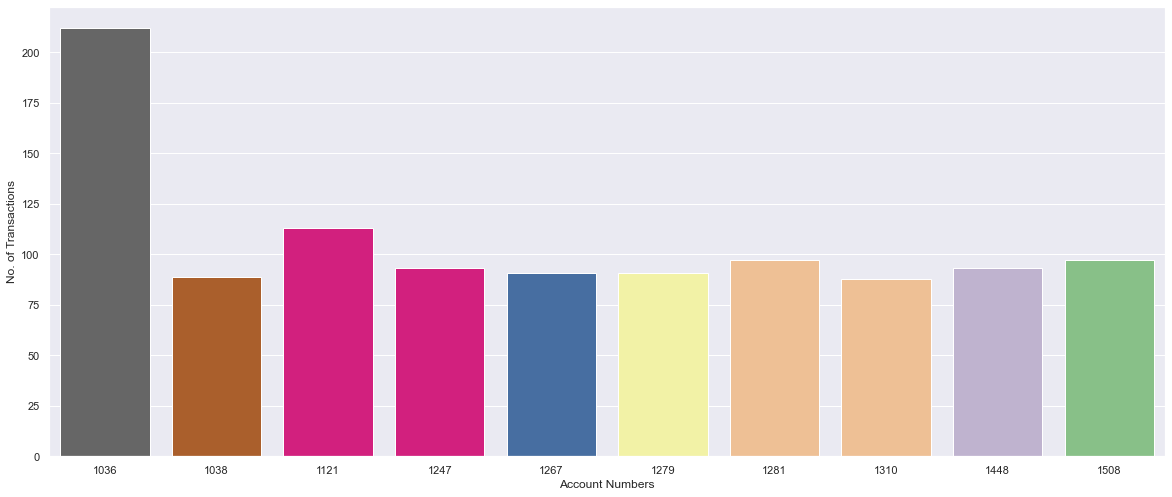

In [30]:
sns.set(rc={'figure.figsize':(20,8.27)})
ax = sns.barplot(x=top_10_acc.index, y=top_10_acc.values, palette="Accent_r")
ax.set(xlabel='Account Numbers', ylabel='No. of Transactions')
plt.show()

In [31]:
top_10_receiver = ctoc_db.Third_Party_Account_Number.value_counts().nlargest(10)

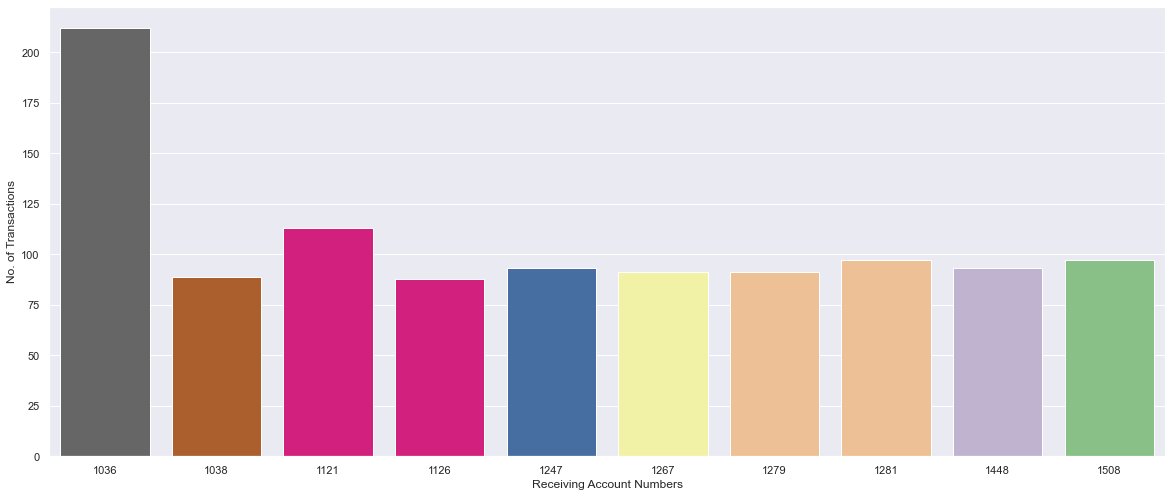

In [32]:
sns.set(rc={'figure.figsize':(20,8.27)})

ax = sns.barplot(x=top_10_receiver.index, y=top_10_receiver.values, palette="Accent_r")
ax.set(xlabel='Receiving Account Numbers', ylabel='No. of Transactions')
plt.show()

In [33]:
ctoc_db.head()

,Account_Number,Amount,Balance,Third_Party_Account_Number,Third_Party_Name,Date,Time,Type_of_Transaction,day_,month_,year_
0,1381,-850.0,2656.70,1036,,0020-01-01 00:00:00,1970-01-01,Debit,1,1,2020
1,1036,850.0,3171.21,1381,,0020-01-01 00:00:00,1970-01-01,Credit,1,1,2020
2,1444,-800.0,2508.76,1036,,0020-01-01 00:00:00,1970-01-01,Debit,1,1,2020
3,1036,800.0,3971.21,1444,,0020-01-01 00:00:00,1970-01-01,Credit,1,1,2020
4,1138,-500.0,759.27,1036,,0020-01-01 00:00:00,1970-01-01,Debit,1,1,2020


In [36]:
# Lets find the average transactions made in C-C transactions

print('Average C-C transactions: ',ctoc_db.Amount.mean())

#Average of 31 pounds is the transaction amount

print('Minimum C-C transactions: ',ctoc_db.Amount.min())

print('Maximum C-C transactions: ',ctoc_db.Amount.max())



Average C-C transactions:  0.0
Minimum C-C transactions:  -11200.0
Maximum C-C transactions:  11200.0


<Axes: xlabel='month_', ylabel='Amount'>

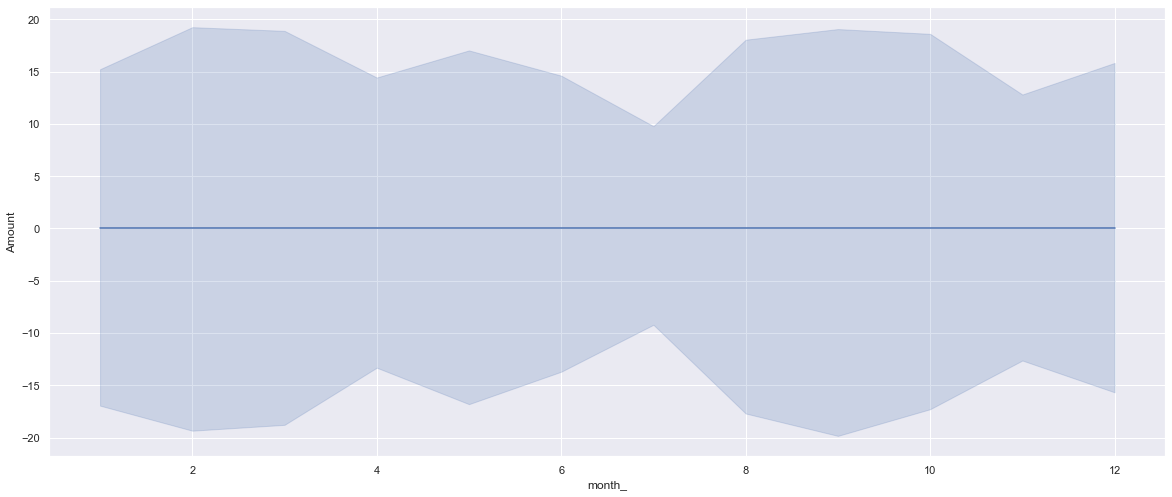

In [35]:
sns.lineplot(data=ctoc_db, x="month_", y="Amount")

<Axes: xlabel='Type_of_Transaction', ylabel='count'>

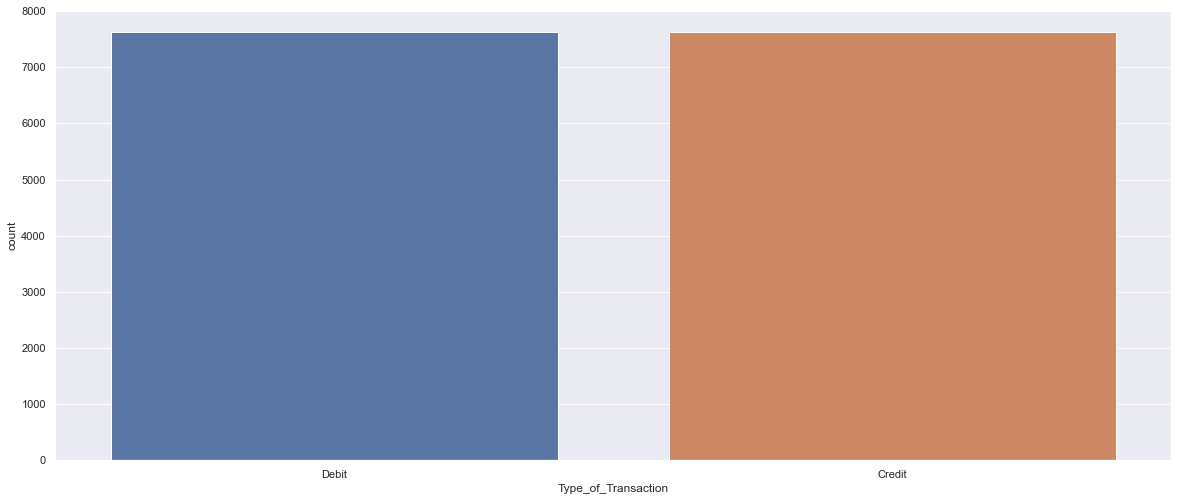

In [53]:
sns.countplot(x=ctoc_db["Type_of_Transaction"])

### Almost Equal debit and credit

# Customer - Business Transactions EDA

In [38]:
ctob_db.head()

,Account_Number,Amount,Balance,Third_Party_Account_Number,Third_Party_Name,Date,Time,Type_of_Transaction,day_,month_,year_
0,1461,1352.0,2582.04,1379.0,Starbucks,0020-01-01 00:00:00,1970-01-01,Credit,1,1,20
1,1088,1251.2,2285.19,1244.0,Adams,0020-01-01 00:00:00,1970-01-01,Credit,1,1,20
2,1447,1968.5,2479.09,1101.0,North Face,0020-01-01 00:00:00,1970-01-01,Credit,1,1,20
3,1207,1352.0,2530.55,1178.0,Coffee #1,0020-01-01 00:00:00,1970-01-01,Credit,1,1,20
4,1136,1968.5,3627.45,1305.0,Cass Art,0020-01-01 00:00:00,1970-01-01,Credit,1,1,20


In [39]:
top_10_bus = ctob_db.Third_Party_Name.value_counts().nlargest(10)

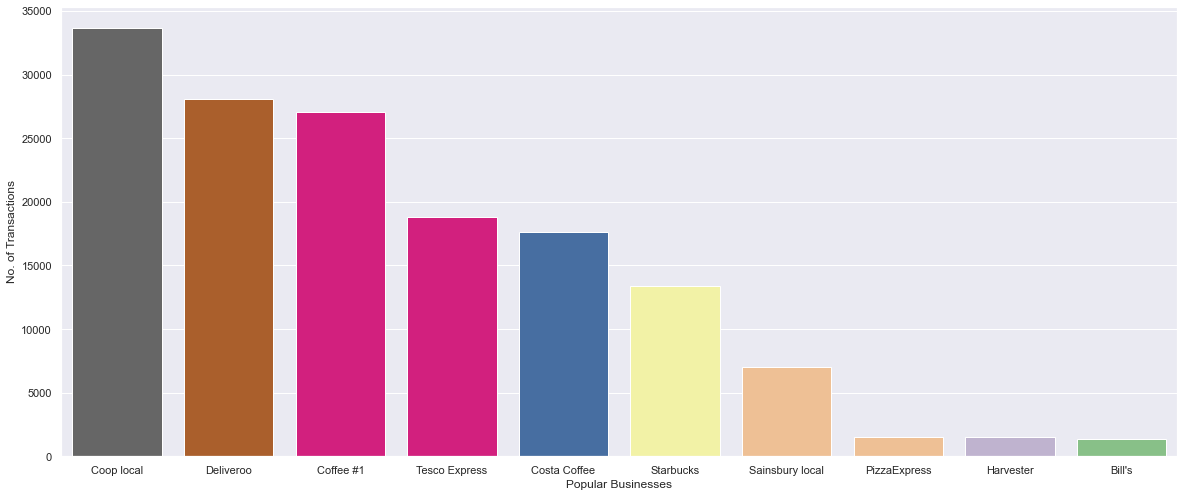

In [40]:
sns.set(rc={'figure.figsize':(20,8.27)})

ax = sns.barplot(x=top_10_bus.index, y=top_10_bus.values, palette="Accent_r")
ax.set(xlabel='Popular Businesses', ylabel='No. of Transactions')
plt.show()

In [42]:
# Lets find the average transactions made in C-C transactions

print('Average C-B transactions: ',ctob_db.Amount.mean())

#Average of 31 pounds is the transaction amount

print('Minimum C-B transactions: ',ctob_db.Amount.min())

print('Maximum C-B transactions: ',ctob_db.Amount.max())



Average C-B transactions:  -9.682685614594382
Minimum C-B transactions:  -1395.0
Maximum C-B transactions:  15350.6


<Axes: xlabel='month_', ylabel='Amount'>

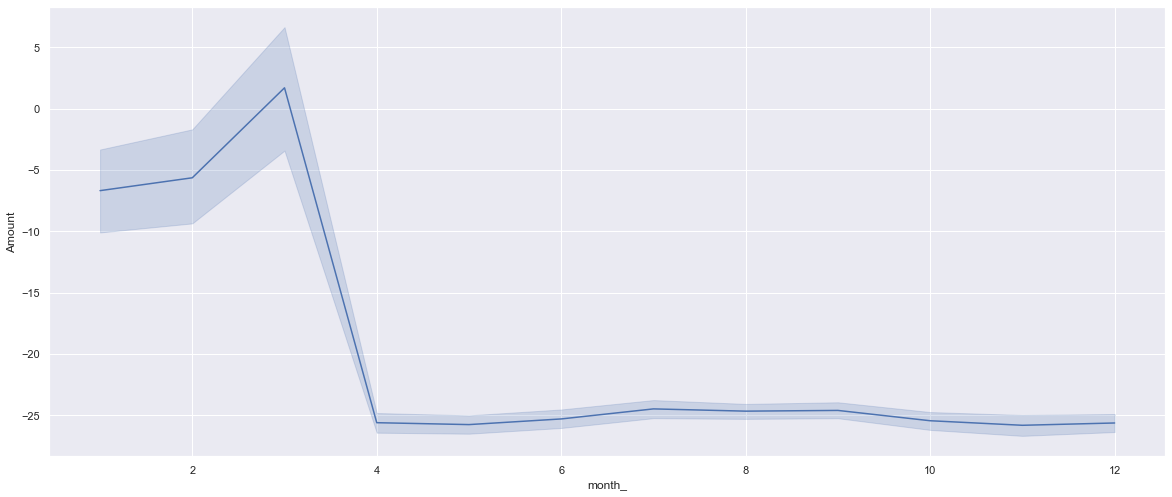

In [43]:
sns.lineplot(data=ctob_db, x="month_", y="Amount")

<Axes: xlabel='day_', ylabel='Amount'>

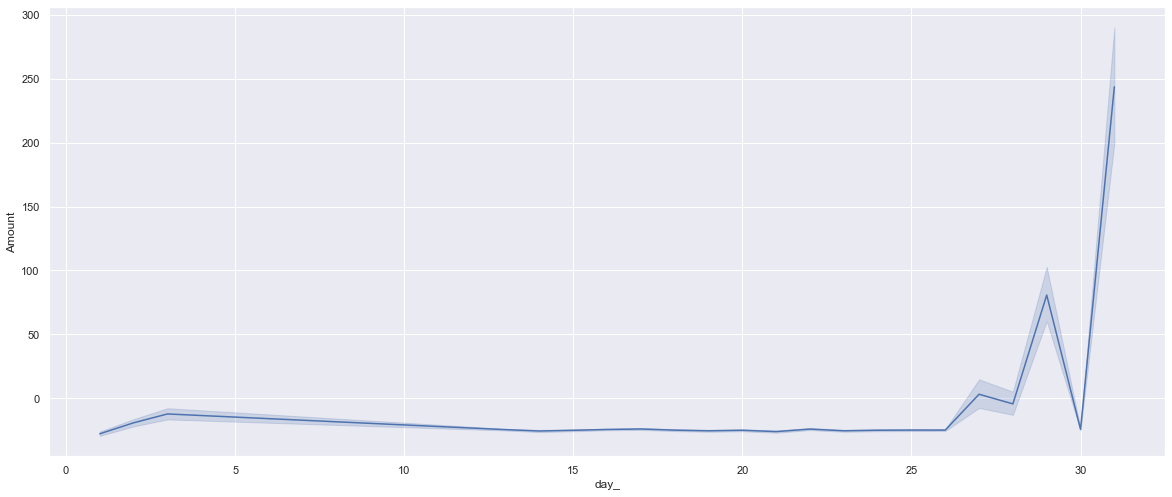

In [44]:
sns.lineplot(data=ctob_db, x="day_", y="Amount")

# Towards end of month the amount of transactions increase

<Axes: xlabel='month_', ylabel='count'>

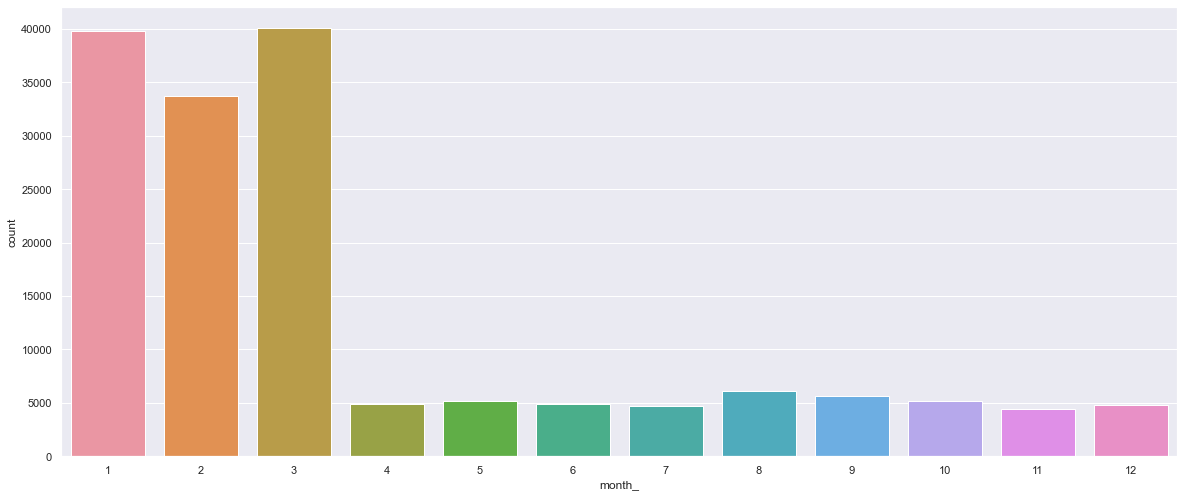

In [45]:
sns.countplot(x=ctob_db["month_"])

# 1st 3 months have highest number of transactions

<Axes: xlabel='Type_of_Transaction', ylabel='count'>

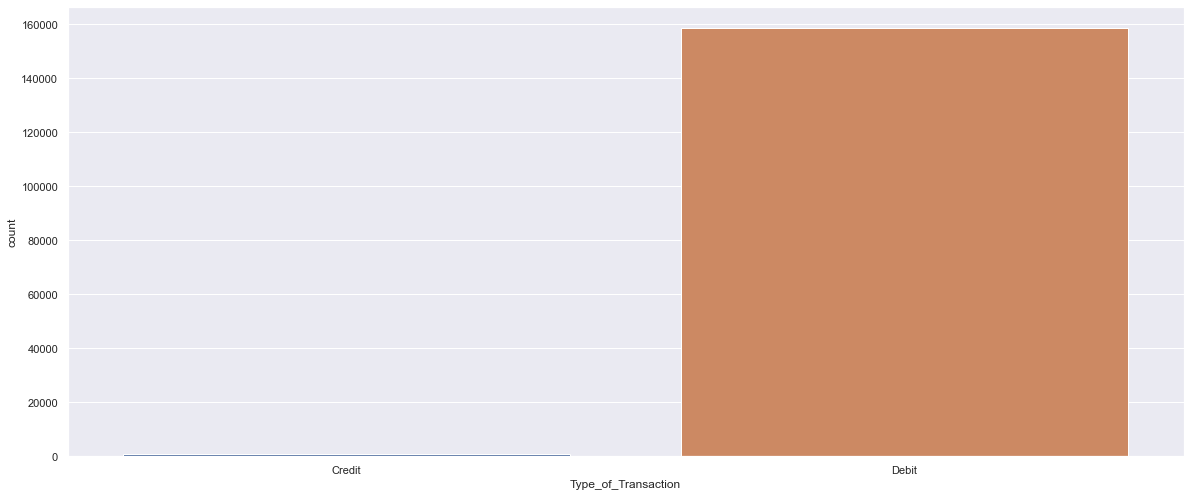

In [52]:
sns.countplot(x=ctob_db["Type_of_Transaction"])

### More debit than credit since it is C-B transactions

In [47]:
ctob_db.head()

,Account_Number,Amount,Balance,Third_Party_Account_Number,Third_Party_Name,Date,Time,Type_of_Transaction,day_,month_,year_
0,1461,1352.0,2582.04,1379.0,Starbucks,0020-01-01 00:00:00,1970-01-01,Credit,1,1,20
1,1088,1251.2,2285.19,1244.0,Adams,0020-01-01 00:00:00,1970-01-01,Credit,1,1,20
2,1447,1968.5,2479.09,1101.0,North Face,0020-01-01 00:00:00,1970-01-01,Credit,1,1,20
3,1207,1352.0,2530.55,1178.0,Coffee #1,0020-01-01 00:00:00,1970-01-01,Credit,1,1,20
4,1136,1968.5,3627.45,1305.0,Cass Art,0020-01-01 00:00:00,1970-01-01,Credit,1,1,20


In [67]:
# Group the data by Account_Number and count the frequency of each group
account_counts = ctob_db.groupby('Account_Number').size().reset_index(name='Frequency')

# Sort the groups in descending order based on frequency and select the top 50
top_50_accounts = account_counts.sort_values(by='Frequency', ascending=False).head(50)

# Display the top 50 accounts
print(top_50_accounts)

     Account_Number  Frequency
40             1042       2842
166            1176       2468
74             1077       2460
473            1518       2356
255            1278       2194
273            1297       1511
388            1426       1240
405            1443       1113
127            1135       1067
107            1113       1052
69             1072        837
393            1431        800
468            1513        786
185            1198        729
354            1386        708
353            1385        697
13             1014        694
32             1034        657
101            1106        652
437            1477        637
276            1300        627
263            1287        603
160            1170        579
460            1505        562
313            1339        560
135            1144        543
170            1181        523
377            1413        499
128            1136        496
52             1055        488
63             1066        467
34      

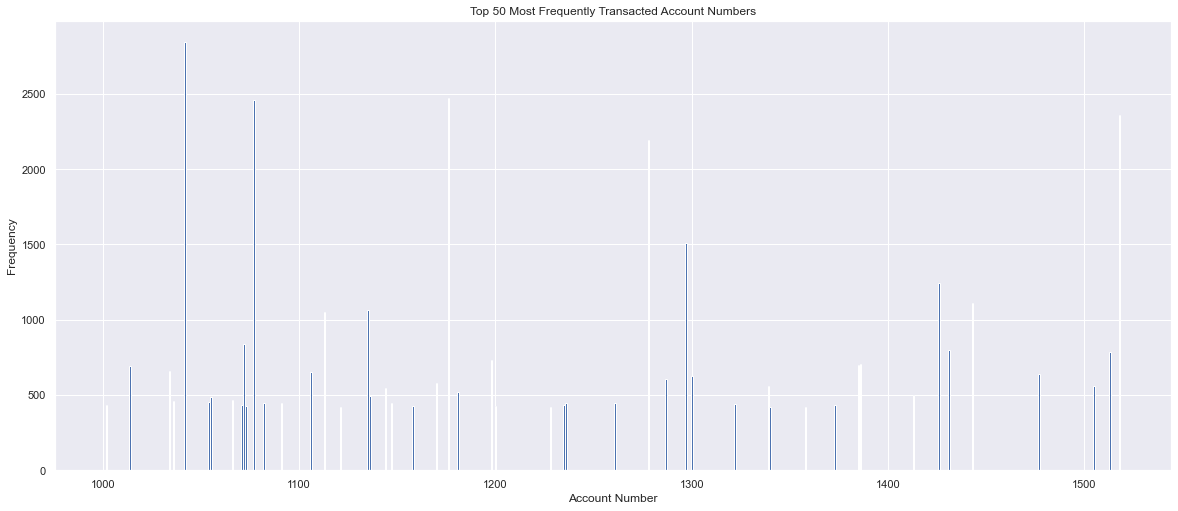

In [68]:
plt.bar(top_50_accounts['Account_Number'], top_50_accounts['Frequency'])
plt.xlabel('Account Number')
plt.ylabel('Frequency')
plt.title('Top 50 Most Frequently Transacted Account Numbers')
plt.show()

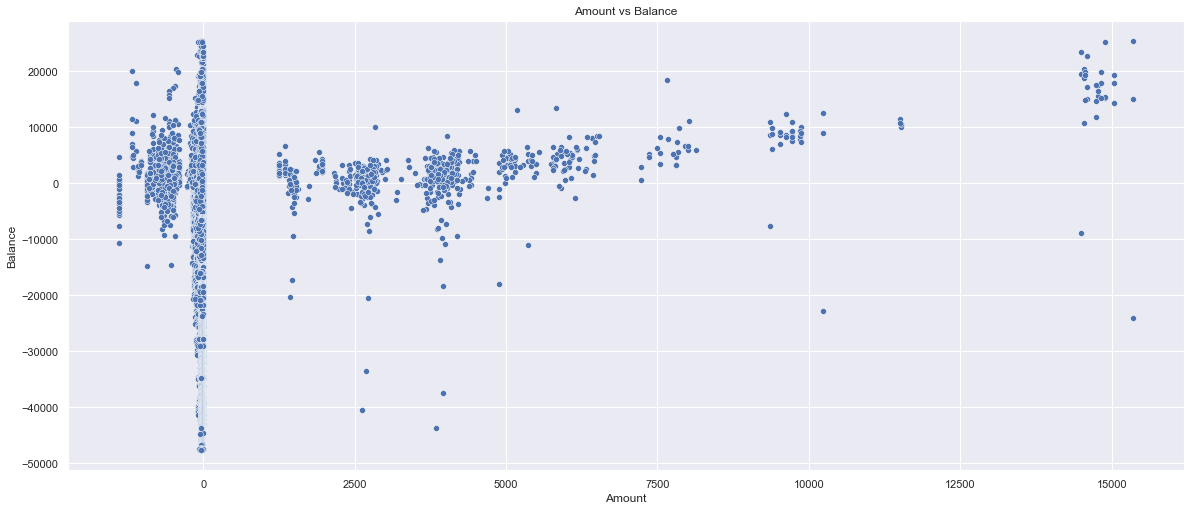

In [70]:
sns.scatterplot(x='Amount', y='Balance', data=ctob_db)
plt.title('Amount vs Balance')
plt.show()

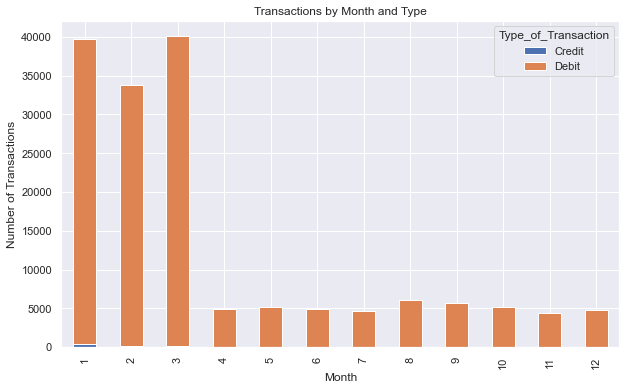

In [74]:
# Group the data by month and transaction type and count the transactions
transactions_by_month = ctob_db.groupby(['month_', 'Type_of_Transaction'])['Amount'].count().reset_index()

# Pivot the data to create a stacked bar chart with a separate bar for each transaction type
transactions_by_month = transactions_by_month.pivot(index='month_', columns='Type_of_Transaction', values='Amount')

# Create a stacked bar chart of the transactions by month
transactions_by_month.plot(kind='bar', stacked=True, figsize=(10,6))
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title('Transactions by Month and Type')
plt.show()

In [78]:
bus_group

,Account_Number,Third_Party_Account_Number,Third_Party_Name,Number_of_Transaction,Total_Amount
0,1000,NaN,Deliveroo,5,-57
1,1000,1142.0,Bill's,1,-45
2,1000,1178.0,Coffee #1,14,-36
3,1000,1197.0,Harvester,1,-44
4,1000,1256.0,ASK Italian,2,-65
...,...,...,...,...,...
6172,1532,1331.0,The Royal Oak,14,-184
6173,1532,1388.0,Costa Coffee,158,-393
6174,1532,1403.0,Coop local,1,-31
6175,1532,1480.0,Red Lion,7,-120


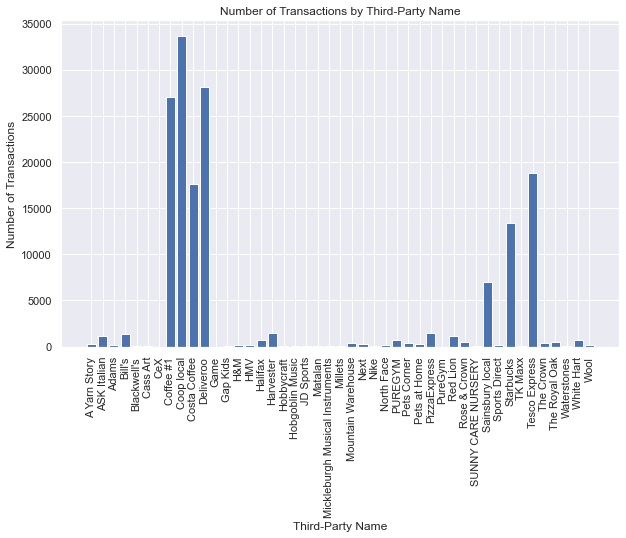

In [79]:
transactions_by_name = bus_group.groupby('Third_Party_Name')['Number_of_Transaction'].sum().reset_index()

# Create a bar chart of the number of transactions by third-party name
plt.figure(figsize=(10,6))
plt.bar(transactions_by_name['Third_Party_Name'], transactions_by_name['Number_of_Transaction'])
plt.xticks(rotation=90)
plt.xlabel('Third-Party Name')
plt.ylabel('Number of Transactions')
plt.title('Number of Transactions by Third-Party Name')
plt.show()

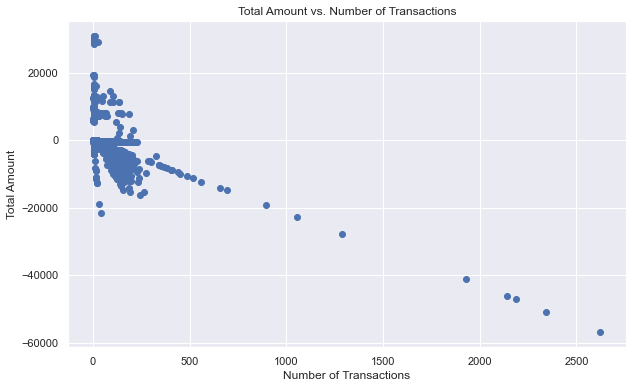

In [80]:
plt.figure(figsize=(10,6))
plt.scatter(bus_group['Number_of_Transaction'], bus_group['Total_Amount'])
plt.xlabel('Number of Transactions')
plt.ylabel('Total Amount')
plt.title('Total Amount vs. Number of Transactions')
plt.show()

In [90]:
top_accounts = bus_group.groupby('Account_Number').agg({'Number_of_Transaction': 'sum'}).sort_values('Number_of_Transaction', ascending=False).reset_index()

# Display the top 10 most transacting accounts
print(top_accounts.head(15))

    Account_Number  Number_of_Transaction
0             1042                   2842
1             1176                   2468
2             1077                   2460
3             1518                   2356
4             1278                   2194
5             1297                   1511
6             1426                   1240
7             1443                   1113
8             1135                   1067
9             1113                   1052
10            1072                    837
11            1431                    800
12            1513                    786
13            1198                    729
14            1386                    708


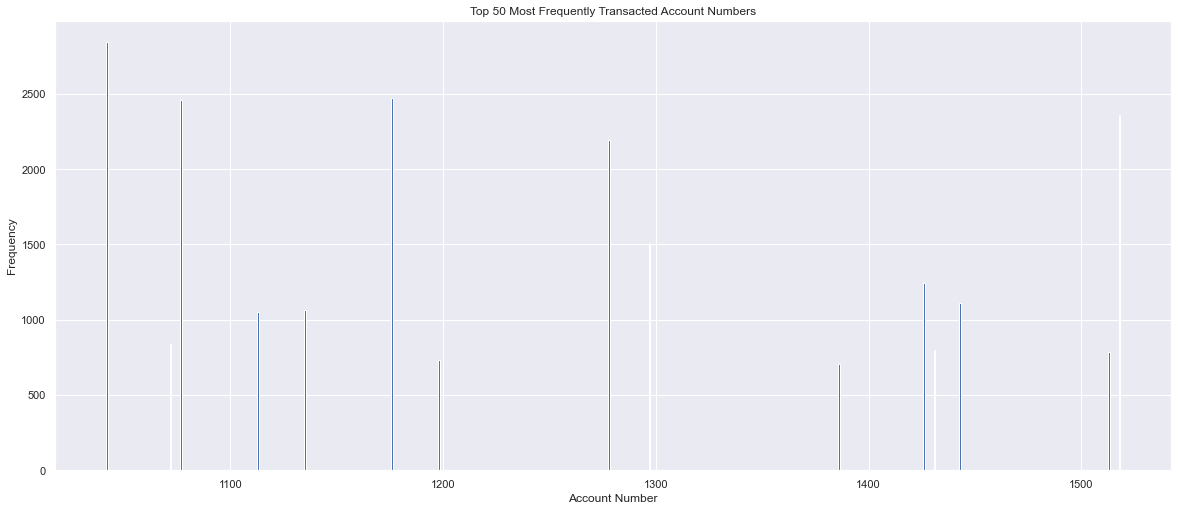

In [92]:
plt.bar(top_accounts.head(15)['Account_Number'], top_accounts.head(15)['Number_of_Transaction'])
plt.xlabel('Account Number')
plt.ylabel('Frequency')
plt.title('Top 50 Most Frequently Transacted Account Numbers')
plt.show()

## Calculating Salary, Expenditure, Savings and End of month balance for each account

In [18]:
cursor.execute("select Account_Number, Third_Party_Name, month_, Salary from (select Account_Number, Third_Party_Name, month_,sum(if(Amount > 0, Amount, 0)) as Salary from lloyds group by 1,2,3 having Third_Party_Name != '') a where Salary > 0")
sal_df = cursor.fetchall()
sal_df = pd.DataFrame(sal_df, columns=[x[0] for x in cursor.description])

In [19]:
cursor.execute("select Account_Number, month_, sum(ABS(if(Amount < 0, Amount, 0))) as Expenditure from lloyds group by 1,2")
exp_df = cursor.fetchall()
exp_df = pd.DataFrame(exp_df, columns=[x[0] for x in cursor.description])

In [20]:
cursor.execute("select sal.Account_Number, sal.month_, (Salary - Expenditure) as Savings from (select Account_Number, Third_Party_Name, month_, Salary from (select Account_Number, Third_Party_Name, month_,sum(if(Amount > 0, Amount, 0)) as Salary from lloyds group by 1,2,3 having Third_Party_Name != '') a where Salary > 0) sal left join (select Account_Number, month_, sum(ABS(if(Amount < 0, Amount, 0))) as Expenditure from lloyds group by 1,2) expe on sal.Account_Number = expe.Account_Number group by 1,2")
sav_df = cursor.fetchall()
sav_df = pd.DataFrame(sav_df, columns=[x[0] for x in cursor.description])

In [21]:
cursor.execute("select Account_Number, month_, Balance from (select Account_Number, month_, Balance, row_number() OVER(PARTITION BY Account_Number,month_ ORDER BY Date DESC, Time Desc) as row_num from lloyds) rn where row_num = 1")
eom_bal_df = cursor.fetchall()
eom_bal_df = pd.DataFrame(eom_bal_df, columns=[x[0] for x in cursor.description])

In [22]:
sal_df

,Account_Number,Third_Party_Name,month_,Salary
0,1000,Sainsbury local,1,1529.569946
1,1000,Sainsbury local,2,2816.469971
2,1000,Sainsbury local,3,4100.009766
3,1001,Rose & Crown,1,5019.339844
4,1001,Rose & Crown,2,9521.269531
...,...,...,...,...
512,1527,Tesco Express,3,3983.030029
513,1529,Mickleburgh Musical Instruments,1,7543.429932
514,1531,Tesco Express,1,1481.140015
515,1531,Tesco Express,2,2701.830078


In [23]:
# eom_bal_df[eom_bal_df['Account_Number']]

In [24]:
eom_bal_df.shape

(5775, 3)

## Overall Customer Segmentation

In [23]:
col_names = ['Number_of_Transaction', 'Total_Amount']
features = lloyds_group[col_names]
# new_features = pd.DataFrame(features, columns = col_names)
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)

Text(0, 0.5, 'Inertia')

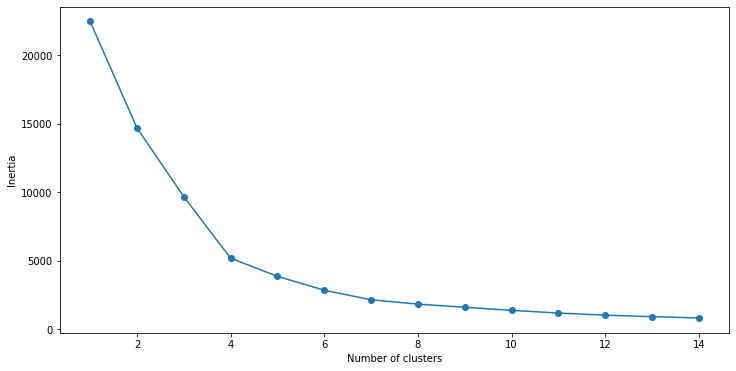

In [24]:
SSE = []
for cluster in range(1,15):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(scaled_features)
    SSE.append(kmeans.inertia_)
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,15), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [25]:
# First, build a model with 4 clusters
kmeans = KMeans( n_clusters = 4, init='k-means++')
kmeans.fit(scaled_features)

KMeans(n_clusters=4)

In [26]:
print(silhouette_score(scaled_features, kmeans.labels_, metric='euclidean'))


0.8742564777557521


In [27]:
pred = kmeans.predict(scaled_features)
frame = pd.DataFrame(lloyds_group)
frame['cluster'] = pred

In [28]:
frame.cluster.value_counts()

cluster
0    10273
1      698
3      267
2        6
Name: count, dtype: int64

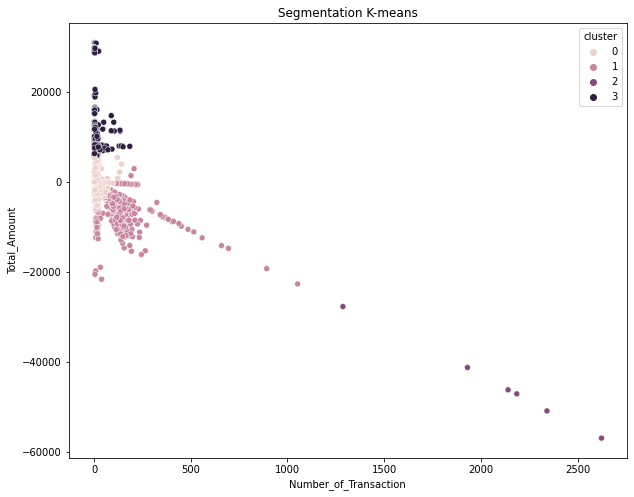

In [29]:
#x_axis = frame['Number_of_Transaction']
#y_axis = frame['Total_Amount']
plt.figure(figsize = (10, 8))
sns.scatterplot(data=frame, x='Number_of_Transaction', y='Total_Amount', hue=frame['cluster'])
plt.title('Segmentation K-means')
plt.show()

## Monthly Segmentation

In [30]:
lloyds_group_mon

,Account_Number,Third_Party_Account_Number,Third_Party_Name,month_,Total_Amount,Number_of_Transaction
0,1000,NaN,Deliveroo,2,-25.419999,2
1,1000,NaN,Deliveroo,3,-8.740000,1
2,1000,NaN,Deliveroo,4,-10.440000,1
3,1000,NaN,Deliveroo,5,-12.440000,1
4,1000,1005.0,,1,23.980000,1
...,...,...,...,...,...,...
35510,1532,1489.0,,10,-17.030000,2
35511,1532,1522.0,PizzaExpress,1,-36.880001,1
35512,1532,1522.0,PizzaExpress,3,-30.740000,1
35513,1532,1525.0,,2,-18.070000,1


In [31]:
col_names = ['Number_of_Transaction', 'Total_Amount']
features = lloyds_group_mon[col_names]
# new_features = pd.DataFrame(features, columns = col_names)
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)

Text(0, 0.5, 'Inertia')

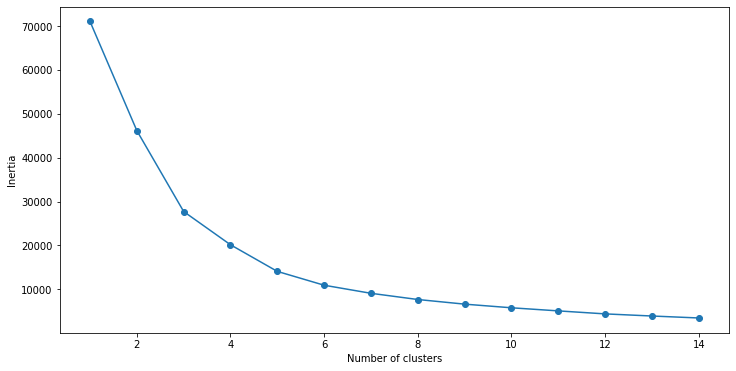

In [32]:
SSE = []
for cluster in range(1,15):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(scaled_features)
    SSE.append(kmeans.inertia_)
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,15), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [33]:
# First, build a model with 3 clusters
kmeans = KMeans( n_clusters = 3, init='k-means++')
kmeans.fit(scaled_features)

KMeans(n_clusters=3)

In [34]:
print(silhouette_score(scaled_features, kmeans.labels_, metric='euclidean'))

0.930261024449093


In [35]:
pred = kmeans.predict(scaled_features)
frame = pd.DataFrame(lloyds_group_mon)
frame['cluster'] = pred

In [36]:
frame.cluster.value_counts()

cluster
0    35098
2      381
1       36
Name: count, dtype: int64

In [37]:
# df_segm_analysis = frame.groupby(['cluster']).mean()
# df_segm_analysis

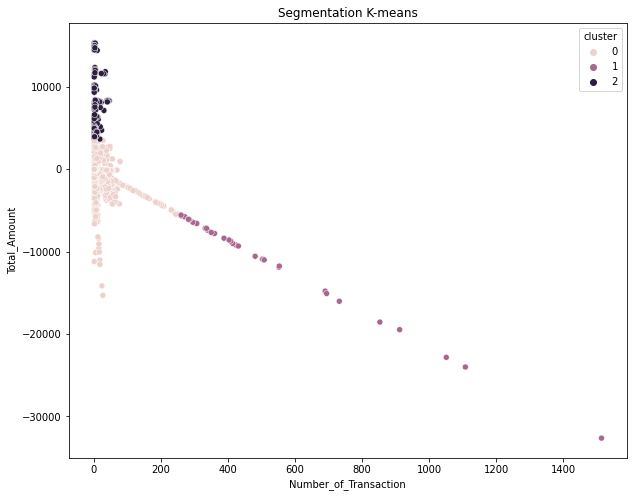

In [38]:
#x_axis = frame['Number_of_Transaction']
#y_axis = frame['Total_Amount']
plt.figure(figsize = (10, 8))
sns.scatterplot(data=frame, x='Number_of_Transaction', y='Total_Amount', hue=frame['cluster'])
plt.title('Segmentation K-means')
plt.show()

## Customer segmentation based on No. of transactions and amount of transactions

In [39]:
cus_group

,Account_Number,Third_Party_Account_Number,Number_of_Transaction,Total_Amount
0,1000,1005,3,-6
1,1000,1029,1,13
2,1000,1098,5,-646
3,1000,1131,1,3
4,1000,1329,1,-15
...,...,...,...,...
5062,1532,1196,1,-7
5063,1532,1312,11,-63
5064,1532,1332,2,-13
5065,1532,1489,19,382


In [40]:
col_names = ['Number_of_Transaction', 'Total_Amount']
features = cus_group[col_names]
# new_features = pd.DataFrame(features, columns = col_names)
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)

Text(0, 0.5, 'Inertia')

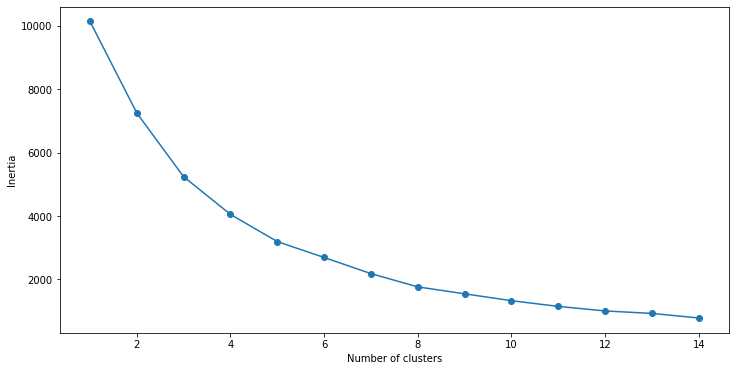

In [41]:
SSE = []
for cluster in range(1,15):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(scaled_features)
    SSE.append(kmeans.inertia_)
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,15), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [42]:
# First, build a model with 3 clusters
kmeans = KMeans( n_clusters = 3, init='k-means++')
kmeans.fit(scaled_features)

KMeans(n_clusters=3)

In [43]:
print(silhouette_score(scaled_features, kmeans.labels_, metric='euclidean'))


0.8432180314460865


In [44]:
pred = kmeans.predict(scaled_features)
frame = pd.DataFrame(cus_group)
frame['cluster'] = pred

In [45]:
frame.head()

,Account_Number,Third_Party_Account_Number,Number_of_Transaction,Total_Amount,cluster
0,1000,1005,3,-6,0
1,1000,1029,1,13,0
2,1000,1098,5,-646,0
3,1000,1131,1,3,0
4,1000,1329,1,-15,0


In [46]:
frame.cluster.value_counts()

cluster
0    4843
1     164
2      60
Name: count, dtype: int64

In [47]:
df_segm_analysis = frame.groupby(['cluster']).mean()
df_segm_analysis

,Account_Number,Third_Party_Account_Number,Number_of_Transaction,Total_Amount
cluster,,,,
0,1262.807970,1262.987817,2.347925,5.291348
1,1271.481707,1271.548780,17.798780,-2537.250000
2,1263.483333,1248.783333,16.033333,6508.050000


In [48]:
df_segm_analysis.rename({0:'Less-Frequent and Amount Transactors',
                         1:'More Frequent and Amount Transactors',
                         })

,Account_Number,Third_Party_Account_Number,Number_of_Transaction,Total_Amount
cluster,,,,
Less-Frequent and Amount Transactors,1262.807970,1262.987817,2.347925,5.291348
More Frequent and Amount Transactors,1271.481707,1271.548780,17.798780,-2537.250000
2,1263.483333,1248.783333,16.033333,6508.050000


In [49]:
frame

,Account_Number,Third_Party_Account_Number,Number_of_Transaction,Total_Amount,cluster
0,1000,1005,3,-6,0
1,1000,1029,1,13,0
2,1000,1098,5,-646,0
3,1000,1131,1,3,0
4,1000,1329,1,-15,0
...,...,...,...,...,...
5062,1532,1196,1,-7,0
5063,1532,1312,11,-63,0
5064,1532,1332,2,-13,0
5065,1532,1489,19,382,1


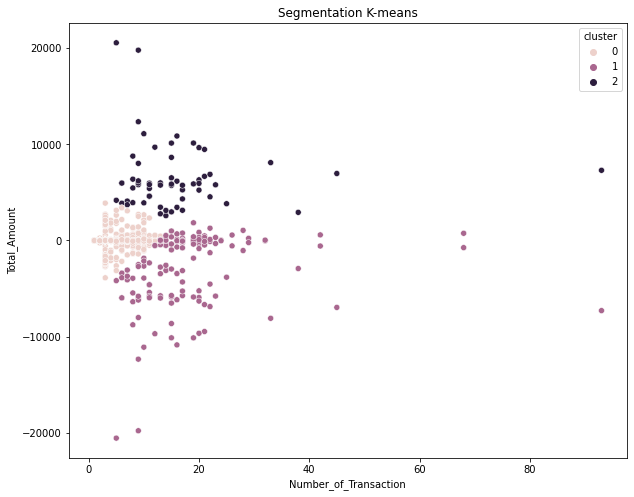

In [50]:
#x_axis = frame['Number_of_Transaction']
#y_axis = frame['Total_Amount']
plt.figure(figsize = (10, 8))
sns.scatterplot(data=frame, x='Number_of_Transaction', y='Total_Amount', hue=frame['cluster'])
plt.title('Segmentation K-means')
plt.show()

In [51]:
bus_group

,Account_Number,Third_Party_Account_Number,Third_Party_Name,Number_of_Transaction,Total_Amount
0,1000,NaN,Deliveroo,5,-57
1,1000,1142.0,Bill's,1,-45
2,1000,1178.0,Coffee #1,14,-36
3,1000,1197.0,Harvester,1,-44
4,1000,1256.0,ASK Italian,2,-65
...,...,...,...,...,...
6172,1532,1331.0,The Royal Oak,14,-184
6173,1532,1388.0,Costa Coffee,158,-393
6174,1532,1403.0,Coop local,1,-31
6175,1532,1480.0,Red Lion,7,-120


In [52]:
col_names = ['Number_of_Transaction', 'Total_Amount']
features2 = bus_group[col_names]
# new_features = pd.DataFrame(features, columns = col_names)
scaler2 = StandardScaler().fit(features2.values)
features2 = scaler.transform(features2.values)
scaled_features2 = pd.DataFrame(features2, columns = col_names)

In [53]:
scaled_features2

,Number_of_Transaction,Total_Amount
0,0.460686,-0.045736
1,-0.465347,-0.036108
2,2.544261,-0.028886
3,-0.465347,-0.035305
4,-0.233838,-0.052155
...,...,...
6172,2.544261,-0.147640
6173,35.881454,-0.315339
6174,-0.465347,-0.024874
6175,0.923703,-0.096287


Text(0, 0.5, 'Inertia')

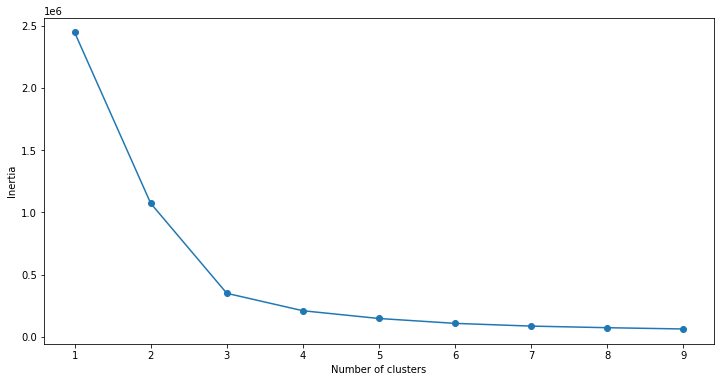

In [54]:
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(scaled_features2)
    SSE.append(kmeans.inertia_)
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [55]:
# First, build a model with 3 clusters
kmeans2 = KMeans( n_clusters = 3, init='k-means++')
kmeans2.fit(scaled_features2)

KMeans(n_clusters=3)

In [56]:
print(silhouette_score(scaled_features2, kmeans2.labels_, metric='euclidean'))


0.8702232663987592


In [57]:
pred2 = kmeans2.predict(scaled_features2)
frame2 = pd.DataFrame(bus_group)
frame2['cluster'] = pred2

In [58]:
frame2

,Account_Number,Third_Party_Account_Number,Third_Party_Name,Number_of_Transaction,Total_Amount,cluster
0,1000,NaN,Deliveroo,5,-57,0
1,1000,1142.0,Bill's,1,-45,0
2,1000,1178.0,Coffee #1,14,-36,0
3,1000,1197.0,Harvester,1,-44,0
4,1000,1256.0,ASK Italian,2,-65,0
...,...,...,...,...,...,...
6172,1532,1331.0,The Royal Oak,14,-184,0
6173,1532,1388.0,Costa Coffee,158,-393,2
6174,1532,1403.0,Coop local,1,-31,0
6175,1532,1480.0,Red Lion,7,-120,0


In [59]:
frame2.cluster.value_counts()

cluster
0    5397
2     774
1       6
Name: count, dtype: int64

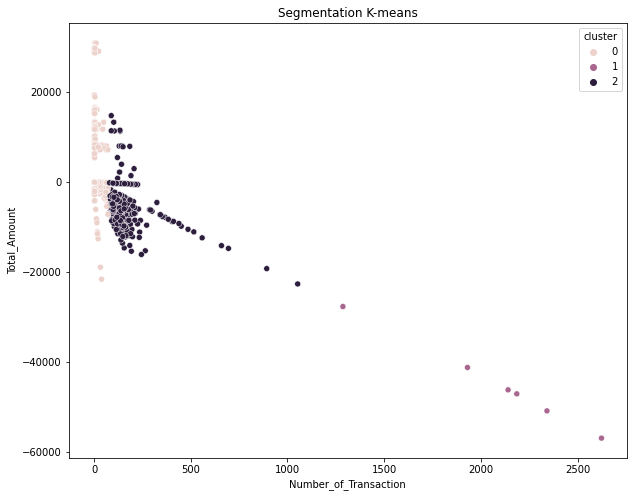

In [60]:
x_axis = frame2['Number_of_Transaction']
y_axis = frame2['Total_Amount']
plt.figure(figsize = (10, 8))
sns.scatterplot(data=frame2, x='Number_of_Transaction', y='Total_Amount', hue=frame2['cluster'])
plt.title('Segmentation K-means')
plt.show()

In [61]:
bus_group_mon['month_'].value_counts()

month_
1     4264
3     3458
2     3377
6     1579
5     1571
4     1557
8     1518
9     1513
7     1503
10    1496
11    1488
12    1485
Name: count, dtype: int64

In [62]:
bus_group_mon['Third_Party_Name'].value_counts()

Third_Party_Name
Coop local                         3758
Costa Coffee                       3013
Coffee #1                          2879
Tesco Express                      2141
Deliveroo                          2058
Starbucks                          1475
PizzaExpress                       1010
Harvester                           960
Bill's                              948
ASK Italian                         845
Sainsbury local                     819
Red Lion                            732
White Hart                          410
Rose & Crown                        337
The Royal Oak                       319
Pets Corner                         266
Mountain Warehouse                  251
The Crown                           238
PUREGYM                             230
Pets at Home                        225
Halifax                             223
Next                                184
A Yarn Story                        172
North Face                          167
Adams                  

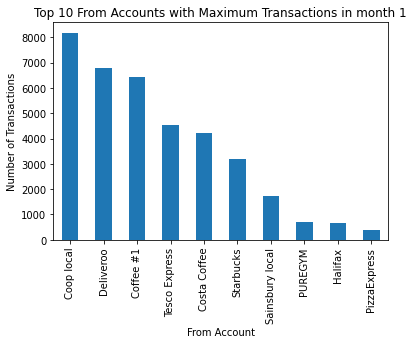

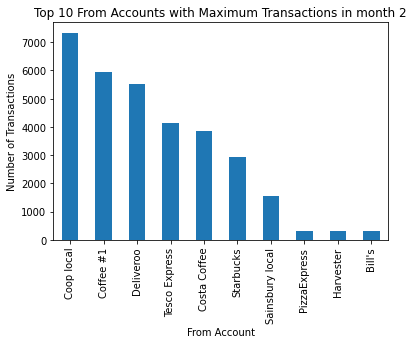

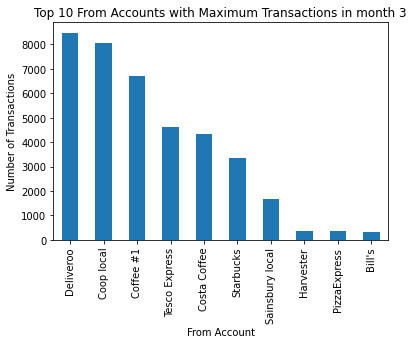

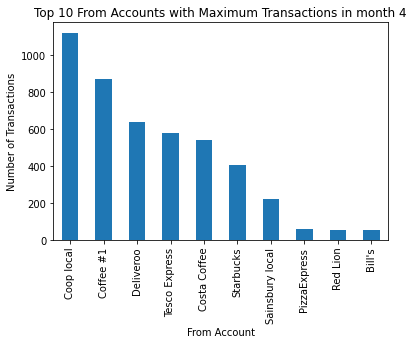

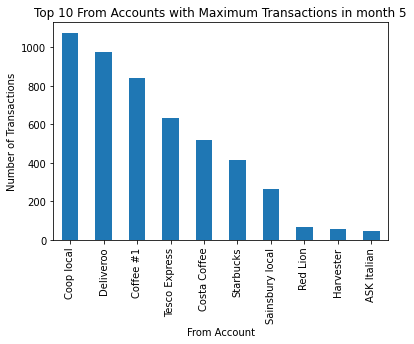

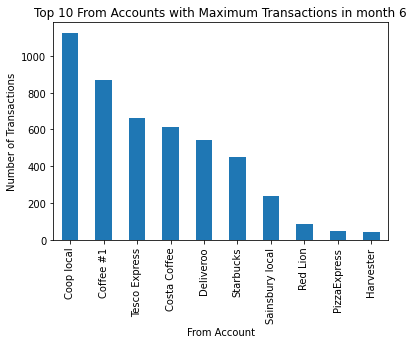

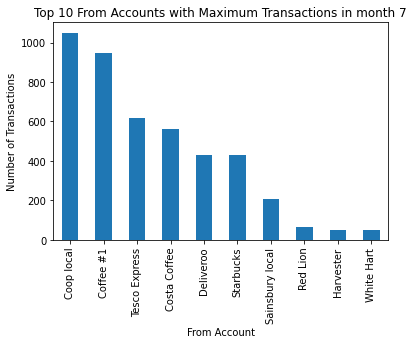

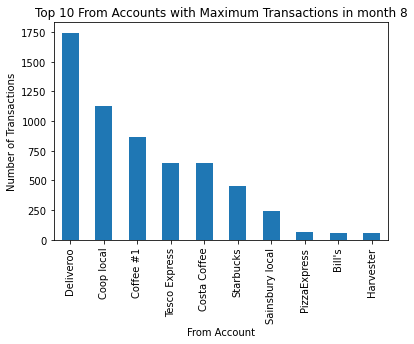

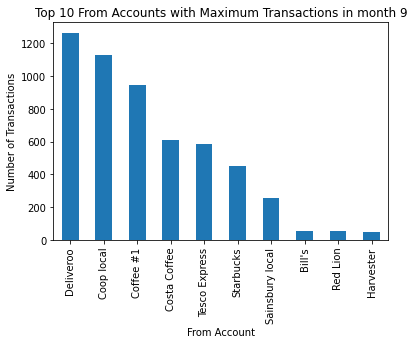

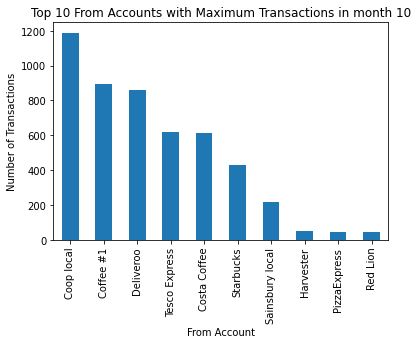

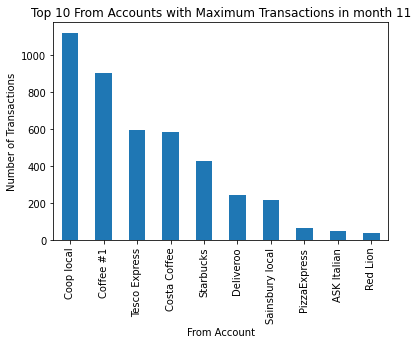

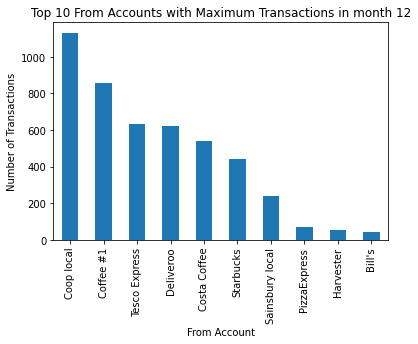

In [63]:
for month in range(1, 13):
    df_mon = bus_group_mon[bus_group_mon["month_"] == month]

    # Group the data by "from_totally_fake_account" and calculate the sum of "Number_of_Transaction"
    df_mon_grouped = df_mon.groupby("Third_Party_Name")["Number_of_Transaction"].sum()

    # Sort the data in descending order based on the sum of "Number_of_Transaction"
    df_mon_grouped_sorted = df_mon_grouped.sort_values(ascending=False)

    # Plot a bar chart of the top 10 from accounts with maximum transactions in January
    df_mon_grouped_sorted.head(10).plot(kind="bar")
    plt.xlabel("From Account")
    plt.ylabel("Number of Transactions")
    plt.title("Top 10 From Accounts with Maximum Transactions in month {}".format(month))
    plt.show()

In [64]:
eom_bal_df

,Account_Number,month_,Balance
0,1000,1,-1477.51
1,1000,2,-1194.79
2,1000,3,153.82
3,1000,4,-1406.88
4,1000,5,-1498.11
...,...,...,...
5770,1532,8,-2506.82
5771,1532,9,-2594.66
5772,1532,10,-2599.26
5773,1532,11,-2649.84


In [65]:
col_names = ['Balance']
features = eom_bal_df[col_names]
# new_features = pd.DataFrame(features, columns = col_names)
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)

Text(0, 0.5, 'Inertia')

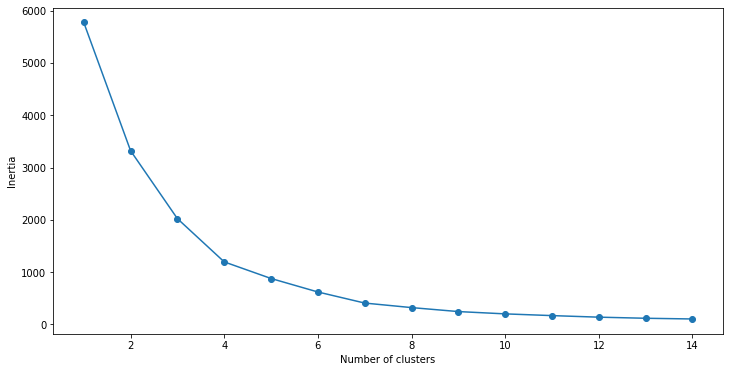

In [66]:
SSE = []
for cluster in range(1,15):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(scaled_features)
    SSE.append(kmeans.inertia_)
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,15), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [67]:
# First, build a model with 4 clusters
kmeans = KMeans( n_clusters = 4, init='k-means++')
kmeans.fit(scaled_features)

KMeans(n_clusters=4)

In [68]:
print(silhouette_score(scaled_features, kmeans.labels_, metric='euclidean'))


0.5588774862736594


In [69]:
pred = kmeans.predict(scaled_features)
frame = pd.DataFrame(eom_bal_df)
frame['cluster'] = pred

In [70]:
frame.cluster.value_counts()

cluster
0    3411
3    1700
1     560
2     104
Name: count, dtype: int64

In [71]:
df_segm_analysis = frame.groupby(['cluster']).mean()
df_segm_analysis

,Account_Number,month_,Balance
cluster,,,
0,1261.996775,6.233069,-614.504055
1,1236.337500,6.532143,7090.630625
2,1273.980769,6.798077,-24834.770192
3,1272.635882,6.950000,-6101.680982


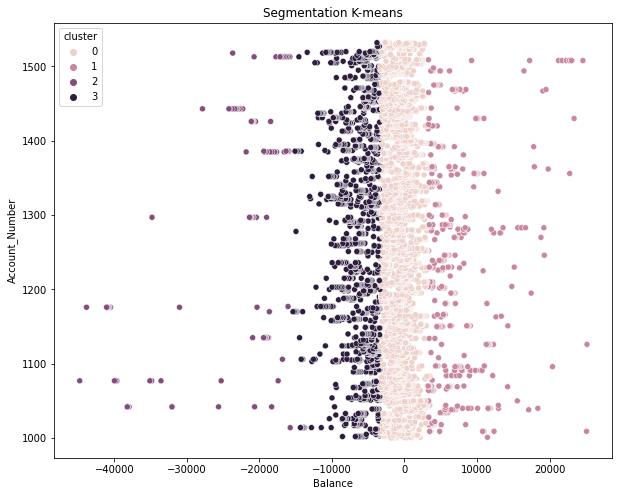

In [72]:
plt.figure(figsize = (10, 8))
sns.scatterplot(data=frame, x='Balance', y='Account_Number', hue=frame['cluster'])
plt.title('Segmentation K-means')
plt.show()

# Anomaly detction

In [73]:
bus_group

,Account_Number,Third_Party_Account_Number,Third_Party_Name,Number_of_Transaction,Total_Amount
0,1000,NaN,Deliveroo,5,-57
1,1000,1142.0,Bill's,1,-45
2,1000,1178.0,Coffee #1,14,-36
3,1000,1197.0,Harvester,1,-44
4,1000,1256.0,ASK Italian,2,-65
...,...,...,...,...,...
6172,1532,1331.0,The Royal Oak,14,-184
6173,1532,1388.0,Costa Coffee,158,-393
6174,1532,1403.0,Coop local,1,-31
6175,1532,1480.0,Red Lion,7,-120


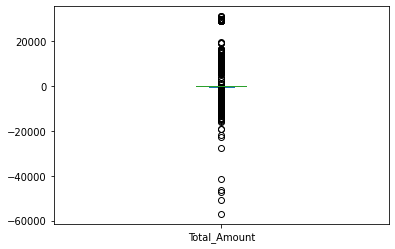

In [74]:
# Generate a Boxplot
bus_group['Total_Amount'].plot(kind='box')
plt.show()

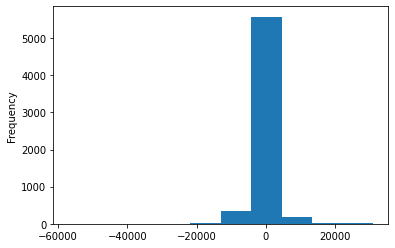

In [75]:
# Generate a Histogram plot
bus_group['Total_Amount'].plot(kind='hist')
plt.show()

In [76]:
print('Minimum Amount ' + str(bus_group['Total_Amount'].min()))
print('Maximum Amount ' + str(bus_group['Total_Amount'].max()))

Minimum Amount -57003
Maximum Amount 30957


In [77]:
amount_raw = bus_group['Total_Amount'].values

# For compatibility with the SciPy implementation
amount_raw = amount_raw.reshape(-1, 1)
amount_raw = amount_raw.astype('float64')

In [78]:
from scipy.cluster.vq import kmeans
    
# Specify the data and the number of clusters to kmeans()
centroids, avg_distance = kmeans(amount_raw, 4)

In [79]:
import scipy

groups, cdist = scipy.cluster.vq.vq(amount_raw, centroids)

In [80]:
len(amount_raw)

6177

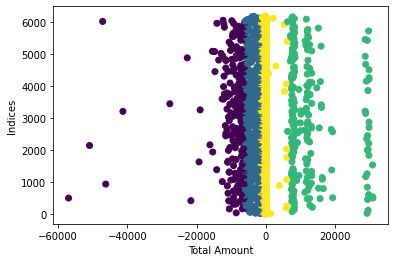

In [81]:
plt.scatter(amount_raw, np.arange(0,6177), c=groups)
plt.xlabel('Total Amount')
plt.ylabel('Indices')
plt.show()

In [82]:
## Anomalies detected. These could be fraudulent transactions

# Business

In [83]:
ctob_db

,Account_Number,Amount,Balance,Third_Party_Account_Number,Third_Party_Name,Date,Time,Type_of_Transaction,day_,month_,year_
0,1461,1352.00,2582.04,1379.0,Starbucks,0020-01-01 00:00:00,1970-01-01 00:00:00,Credit,1,1,20
1,1088,1251.20,2285.19,1244.0,Adams,0020-01-01 00:00:00,1970-01-01 00:00:00,Credit,1,1,20
2,1447,1968.50,2479.09,1101.0,North Face,0020-01-01 00:00:00,1970-01-01 00:00:00,Credit,1,1,20
3,1207,1352.00,2530.55,1178.0,Coffee #1,0020-01-01 00:00:00,1970-01-01 00:00:00,Credit,1,1,20
4,1136,1968.50,3627.45,1305.0,Cass Art,0020-01-01 00:00:00,1970-01-01 00:00:00,Credit,1,1,20
...,...,...,...,...,...,...,...,...,...,...,...
159344,1391,-19.24,-6585.98,NaN,Deliveroo,0020-03-31 00:00:00,1970-01-01 23:55:00,Debit,31,3,2020
159345,1405,-10.99,-1179.87,NaN,Deliveroo,0020-03-31 00:00:00,1970-01-01 23:56:00,Debit,31,3,2020
159346,1391,-20.89,-6606.87,NaN,Deliveroo,0020-03-31 00:00:00,1970-01-01 23:56:00,Debit,31,3,2020
159347,1391,-17.24,-6624.11,NaN,Deliveroo,0020-03-31 00:00:00,1970-01-01 23:57:00,Debit,31,3,2020


In [84]:
ctob = ctob_db.copy()

In [85]:
from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
ctob['Third_Party_Name']= label_encoder.fit_transform(ctob['Third_Party_Name'])
  
ctob['Third_Party_Name'].unique()

array([37,  2, 26,  7,  5, 38, 21, 28, 29,  9, 42, 12, 11, 13,  4, 15, 34,
       27,  8, 10, 39, 35, 19, 23, 24, 25, 36, 20, 22,  0, 17, 14, 44, 18,
       40, 43,  1, 33, 32, 41, 16,  3, 30,  6, 31])

In [86]:
ctob['Type_of_Transaction']= label_encoder.fit_transform(ctob['Type_of_Transaction'])
  
ctob['Type_of_Transaction'].unique()

array([0, 1])

In [87]:
ctob.year_.unique()

array([  20, 2020], dtype=int64)

In [88]:
ctob['year_'] = ctob['year_'].replace(20, 2020)

In [89]:
ctob

,Account_Number,Amount,Balance,Third_Party_Account_Number,Third_Party_Name,Date,Time,Type_of_Transaction,day_,month_,year_
0,1461,1352.00,2582.04,1379.0,37,0020-01-01 00:00:00,1970-01-01 00:00:00,0,1,1,2020
1,1088,1251.20,2285.19,1244.0,2,0020-01-01 00:00:00,1970-01-01 00:00:00,0,1,1,2020
2,1447,1968.50,2479.09,1101.0,26,0020-01-01 00:00:00,1970-01-01 00:00:00,0,1,1,2020
3,1207,1352.00,2530.55,1178.0,7,0020-01-01 00:00:00,1970-01-01 00:00:00,0,1,1,2020
4,1136,1968.50,3627.45,1305.0,5,0020-01-01 00:00:00,1970-01-01 00:00:00,0,1,1,2020
...,...,...,...,...,...,...,...,...,...,...,...
159344,1391,-19.24,-6585.98,NaN,10,0020-03-31 00:00:00,1970-01-01 23:55:00,1,31,3,2020
159345,1405,-10.99,-1179.87,NaN,10,0020-03-31 00:00:00,1970-01-01 23:56:00,1,31,3,2020
159346,1391,-20.89,-6606.87,NaN,10,0020-03-31 00:00:00,1970-01-01 23:56:00,1,31,3,2020
159347,1391,-17.24,-6624.11,NaN,10,0020-03-31 00:00:00,1970-01-01 23:57:00,1,31,3,2020


In [90]:
# select the features and target variable
X = ctob[['Third_Party_Name', 'Type_of_Transaction', 'day_', 'month_', 'year_']]
y = ctob['Balance']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit a linear regression model to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions on the testing data
y_pred = model.predict(X_test)

# evaluate the performance of the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

Mean squared error: 47917600.948486984


In [91]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)
Y_pred = regressor.predict(X_test)
mseR = mean_squared_error(y_test, Y_pred)
print('Mean squared error:', mseR)

Mean squared error: 27108620.45924782


In [90]:
ctob_db

,Account_Number,Amount,Balance,Third_Party_Account_Number,Third_Party_Name,Date,Time,Type_of_Transaction,day_,month_,year_
0,1461,1352.00,2582.04,1379.0,Starbucks,0020-01-01 00:00:00,1970-01-01 00:00:00,Credit,1,1,20
1,1088,1251.20,2285.19,1244.0,Adams,0020-01-01 00:00:00,1970-01-01 00:00:00,Credit,1,1,20
2,1447,1968.50,2479.09,1101.0,North Face,0020-01-01 00:00:00,1970-01-01 00:00:00,Credit,1,1,20
3,1207,1352.00,2530.55,1178.0,Coffee #1,0020-01-01 00:00:00,1970-01-01 00:00:00,Credit,1,1,20
4,1136,1968.50,3627.45,1305.0,Cass Art,0020-01-01 00:00:00,1970-01-01 00:00:00,Credit,1,1,20
...,...,...,...,...,...,...,...,...,...,...,...
159344,1391,-19.24,-6585.98,NaN,Deliveroo,0020-03-31 00:00:00,1970-01-01 23:55:00,Debit,31,3,2020
159345,1405,-10.99,-1179.87,NaN,Deliveroo,0020-03-31 00:00:00,1970-01-01 23:56:00,Debit,31,3,2020
159346,1391,-20.89,-6606.87,NaN,Deliveroo,0020-03-31 00:00:00,1970-01-01 23:56:00,Debit,31,3,2020
159347,1391,-17.24,-6624.11,NaN,Deliveroo,0020-03-31 00:00:00,1970-01-01 23:57:00,Debit,31,3,2020


In [91]:
bus_group

,Account_Number,Third_Party_Account_Number,Third_Party_Name,Number_of_Transaction,Total_Amount
0,1000,NaN,Deliveroo,5,-57
1,1000,1142.0,Bill's,1,-45
2,1000,1178.0,Coffee #1,14,-36
3,1000,1197.0,Harvester,1,-44
4,1000,1256.0,ASK Italian,2,-65
...,...,...,...,...,...
6172,1532,1331.0,The Royal Oak,14,-184
6173,1532,1388.0,Costa Coffee,158,-393
6174,1532,1403.0,Coop local,1,-31
6175,1532,1480.0,Red Lion,7,-120
